### 拟合  
根据一组已知点求近似函数，但不要求过已知点

```python
np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```  
* x	array类型，形状 (M,)，M 个样本点的 x 坐标(x[i], y[i])
* y	array类型，形状 (M,) 或 (M, K)，样本点的 y 坐标
* deg int型常量，拟合多项式的最高次项  
返回值：各个系数，p 的个数为 deg+1  
多项式：$f(x)=p_0x^{deg}+p_1x^{deg-1}+p_2x^{deg-2}+...+p_{deg}$

        3         2
0.1215 x - 3.045 x + 28.62 x - 34.47


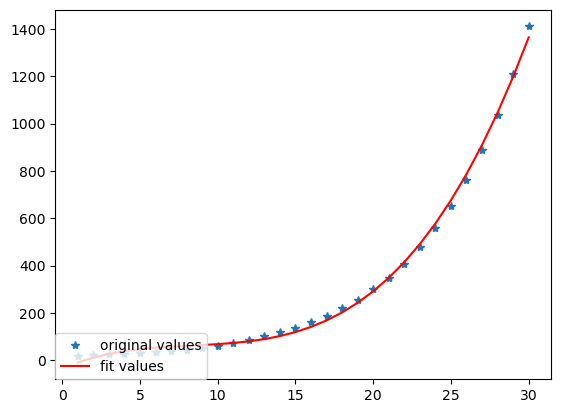

In [1]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    x = np.arange(1, 31, 1)
    y = np.array(
        [20, 23, 26, 29, 32, 35, 38, 45, 53, 62, 73, 86, 101, 118, 138, 161, 188, 220, 257, 300, 350, 409, 478, 558,
         651, 760, 887, 1035, 1208, 1410])

    z1 = np.polyfit(x, y, 3)  # 曲线拟合，返回值为多项式的各项系数
    p1 = np.poly1d(z1)  # 返回值为多项式的表达式，也就是函数式子
    print(p1)
    y_pred = p1(x)  # 根据函数的多项式表达式，求解 y
    # print(np.polyval(p1, 29))             #根据多项式求解特定 x 对应的 y 值
    # print(np.polyval(z1, 29))             #根据多项式求解特定 x 对应的 y 值
    plot1 = plt.plot(x, y, '*', label='original values')
    plot2 = plt.plot(x, y_pred, 'r', label='fit values')
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
    plt.show()


```python
scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
```
* f 要拟合的函数形式f(x,...)

* xdata 自变量数据，根据自变量个数，如果是一个则为一维数组，如果多于一个，则为二维数组，数组行数是自变量个数；

* ydata 因变量数据，应该为一维数组，长度与xdata相同

* p0 需要拟合的未知参数的可能取值

* bounds 未知参数的范围，如果元组中是整数如(-5, 5)，则所有未知参数均在此范围内寻找，也可以分别制定每个未知参数的范围，形式如([-5,-5,-5],[5,5,5])

* method 用于优化的方法，有{‘lm’, ‘trf’, ‘dogbox’}三种取值，对于没有约束的问题使用‘lm’，对于有约束即指定了bounds的问题使用‘trf’，如果数据量小于未知参数个数，则‘lm’将不起作用，此时使用‘trf’，‘dogbox’。

return：popt和pcov，popt是使误差平方和最小化的最优拟合参数值，pcov是popt的估计近似协方差

[ 1.16791847 13.39168878  1.24633841]
[[ 1.50995344e-07 -5.08886038e-05  2.11811171e-04]
 [-5.08886038e-05  1.72868084e-02 -7.46798007e-02]
 [ 2.11811171e-04 -7.46798007e-02  4.85791760e-01]]


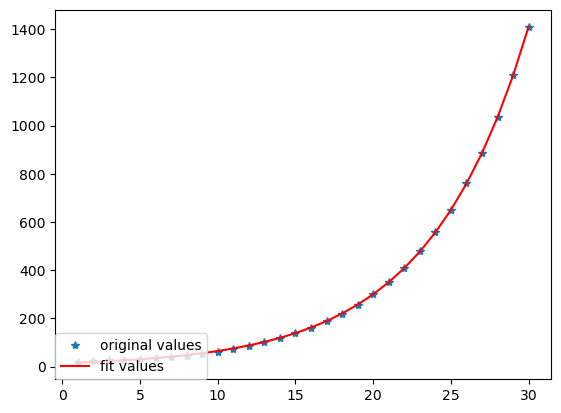

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def func(x, a, b, c):
    return b * np.power(a, x) + c


if __name__ == "__main__":
    x = np.arange(1, 31, 1)
    y = np.array(
        [20, 23, 26, 29, 32, 35, 38, 45, 53, 62, 73, 86, 101, 118, 138, 161, 188, 220, 257, 300, 350, 409, 478, 558,
         651, 760, 887, 1035, 1208, 1410])

    popt, pcov = curve_fit(func, x, y)  # 曲线拟合，popt为函数的参数list
    y_pred = [func(i, popt[0], popt[1], popt[2]) for i in x]  # 直接用函数和函数参数list来进行y值的计算
    print(popt)
    print(pcov)

    plot1 = plt.plot(x, y, '*', label='original values')
    plot2 = plt.plot(x, y_pred, 'r', label='fit values')
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
    plt.show()
